## Data Exploration
---

With the previously pulled and cleaned data (see  *01_do_data_collection.py* and *02_do_data_cleaning.py* scripts), the following exploratory data analysis (EDA) looks to determine general patterns and characteristics of the project data prior to modeling.

Overarching exploratory questions of topic addressed:

* Are there any favorite, retweet or text length patterns according to tweet topic?
* Are there any correlations between tweet topic and tweet length?
* What are the most commonly used words and phrases in current depression and anxiety oriented tweets?

Loading initial libraries and functions...

In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/emilyburns/Documents/Data_Science/projects/twitter_nlp/code/script/functions"))
from funs_do_exploratory_data_analysis import *
import numpy as np
import pandas as pd

Loading clean dataframe...

In [43]:
clean_df = pd.read_csv('/Users/emilyburns/Documents/Data_Science/projects/twitter_nlp/data/processed_data/mi_twitter_data_clean.csv', 
                       index_col = 1)

In [44]:
'Shape of text data: {}'.format(clean_df.shape)

'Shape of text data: (98666, 8)'

In [45]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98666 entries, 1309510316674420737 to 1309874798558736384
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_Created     98666 non-null  object
 1   Full_Text        98666 non-null  object
 2   Entities         98666 non-null  object
 3   Count_Retweets   98666 non-null  int64 
 4   Count_Favorites  98666 non-null  int64 
 5   MI_Type          98666 non-null  int64 
 6   Clean_Text       98665 non-null  object
 7   Text_Length      98666 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.8+ MB


In [46]:
clean_df['Clean_Text'] = clean_df['Clean_Text'].astype('|S')

In [47]:
clean_df.head()

,Date_Created,Full_Text,Entities,Count_Retweets,Count_Favorites,MI_Type,Clean_Text,Text_Length
Tweet_ID,,,,,,,,
1309510316674420737,2020-09-25 15:09:23,"Whatever happens in this next wave of Covid, w...","{'hashtags': [], 'symbols': [], 'user_mentions...",357,1042,0,b'whatever happens in this next wave of covid ...,283
1309586933073367040,2020-09-25 20:13:50,What happened here is no less than what ISIS d...,"{'hashtags': [], 'symbols': [], 'user_mentions...",520,1471,0,b'what happened here is no less than what isis...,221
1309278848568098816,2020-09-24 23:49:37,It’s not just depression it’s “unemployed duri...,"{'hashtags': [], 'symbols': [], 'user_mentions...",964,4335,0,b'its not just depression its unemployed durin...,202
1309907527954558983,2020-09-26 17:27:46,@sweetteatime55 @MissesDread For me it was 4 y...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,0,b'for me it was years just when i was about to...,182
1309907495943647235,2020-09-26 17:27:38,@carolangelad @YouTube Mini Mike Bloomberg is ...,{'hashtags': [{'text': 'Trump2020LandslideVict...,0,0,0,b'mini mike bloomberg is paying million for fe...,234


In [48]:
clean_df.tail()

,Date_Created,Full_Text,Entities,Count_Retweets,Count_Favorites,MI_Type,Clean_Text,Text_Length
Tweet_ID,,,,,,,,
1309874816749654016,2020-09-26 15:17:47,I come off awkward as hell and get mega anxiou...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,2,1,b'i come off awkward as hell and get mega anxi...,253
1309874811821125633,2020-09-26 15:17:46,@megha_anand09 Oh Sorry! I considered anxiety ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,1,b'oh sorry i considered anxiety here as a stat...,118
1309874810546204673,2020-09-26 15:17:45,"As the end of the year nears, thinking about t...","{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,1,b'as the end of the year nears thinking about ...,141
1309874807849197568,2020-09-26 15:17:45,Any small accomplishments overcoming anxiety i...,"{'hashtags': [], 'symbols': [], 'user_mentions...",1,5,1,b'any small accomplishments overcoming anxiety...,192
1309874798558736384,2020-09-26 15:17:42,Add my anxiety to the mix ❤️ gotta love it ❤️,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,1,b'add my anxiety to the mix gotta love it',39


---
The dataframe we'll be utilizing has 98666 tweets (rows) and 8 variables (columns) indexed according to the unique ID each tweet has. There are no missing values, as each value was a tweet retreived using the Twitter API. For variable-specific descriptions, refer to the project codebook.

Let's now start taking a look at potential patterns in tweet favorites, retweets and length to get a better feel for how the expression of anxiety and depression manifest on the Twitter platform. 

---

In [49]:
clean_df.iloc[:, 3:5].describe()

,Count_Retweets,Count_Favorites
count,98666.000000,98666.000000
mean,1.396286,9.814100
std,98.023113,524.063047
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,28528.000000,150575.000000


---
From the above table, we can see that retweets and favorites have an extremely wide range, which is to be expected given the variability of popular and personal accounts on the platform. We can also see that, although the maxiumum number of favorites and retweets is in the thousands, the high majority of tweets don't have any favorites or retweets, although the average number of favorites is slightly higher than retweets. 

We'll next split the dataset according to depression and anxiety oriented tweets to get a closer look how both these characteristics vary according to topic. 

---

In [50]:
dep_df = clean_df[clean_df['MI_Type'] == 0]
anx_df = clean_df[clean_df['MI_Type'] == 1]

In [51]:
dep_df.iloc[:, 3:5].describe()

,Count_Retweets,Count_Favorites
count,48666.000000,48666.000000
mean,2.010418,13.698845
std,133.380522,731.041999
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,28528.000000,150575.000000


In [52]:
anx_df.iloc[:, 3:5].describe()

,Count_Retweets,Count_Favorites
count,50000.000000,50000.000000
mean,0.798540,6.033000
std,40.551953,147.544352
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,6721.000000,22176.000000


---
The depression-oriented tweets have higher maximum and average number of favorites and retweets compared to anxiety-oriented tweets, but there isn't an extreme difference between the two topics. 

Let's also look at the tweets according to length.

---

In [53]:
TweetLength(clean_df['Text_Length'])

'Longest text length: 287, Shortest text length: 0, Average text length: 126.18'

In [54]:
TweetLength(dep_df['Text_Length'])

'Longest text length: 287, Shortest text length: 0, Average text length: 132.42'

In [55]:
TweetLength(anx_df['Text_Length'])

'Longest text length: 284, Shortest text length: 4, Average text length: 120.11'

---
Again, here we can see that the tweets don't vary much according to length. Let's visualize the tweet characteristics with a few plots to get a better feel for these differences. 

In [56]:
%matplotlib inline
sns.set_style('white')

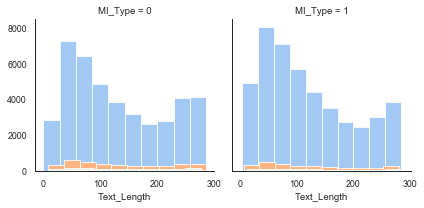

In [57]:
LengthHist(clean_df, 'MI_Type', 'Count_Retweets')

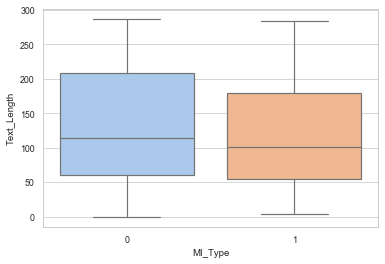

In [58]:
LengthBoxPlot(clean_df, 'MI_Type', 'Text_Length')

<Figure size 1080x576 with 0 Axes>

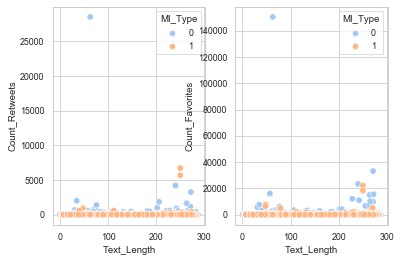

<Figure size 1080x576 with 0 Axes>

In [59]:
LengthScatterPlot(clean_df, 'Text_Length', 'Count_Retweets', 
                  'Count_Favorites', 'MI_Type')

---
The above plots confirm that depression-oriented tweets do tend to be longer than anxiety-oriented tweets, but the high variability between the two is similar.  

There may also be strongly associated variables we should take note of. A correlation heatmap can help establish any patterns within the data.

---

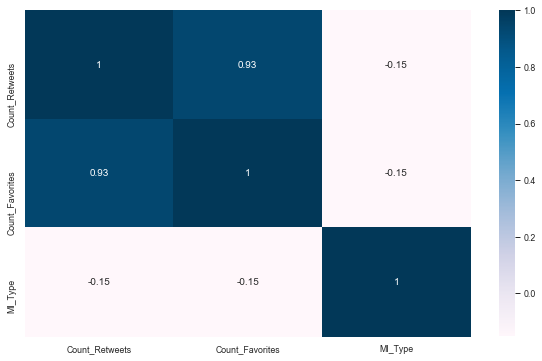

In [60]:
CorHeatmap(clean_df, 'Text_Length')

---
The number of favorites and retweets a tweet receives are very highly correlated, but there is very low association between the MI type and the favorites and retweets the related tweets receive.

To wrap our EDA up, we'll also take a look at the most commonly used words and phrases in current depression and anxiety oriented tweets. We'll look at these trends by separating each tweet into trigrams in order to gain the most information we can about the dataset.

---

In [24]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

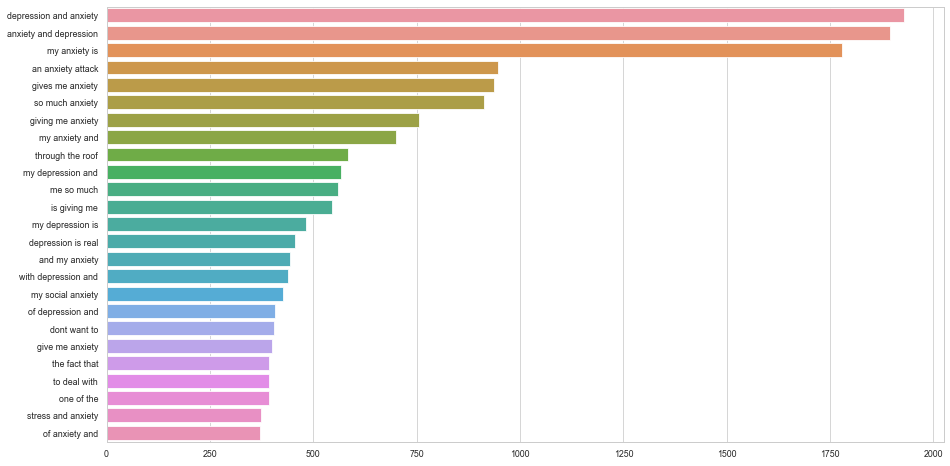

In [61]:
total_trigrams = top_ngrams(clean_df['Clean_Text'], 3)[:25]
PlotTrigrams(total_trigrams)

---
Of the entire text corpus, the top trigram is 'depression and anxiety' or 'anxiety and depression,' with other popular word combinations often centered around 'my' and 'give'and an expression conveying emotions associated with stress or negative emotion. 

---

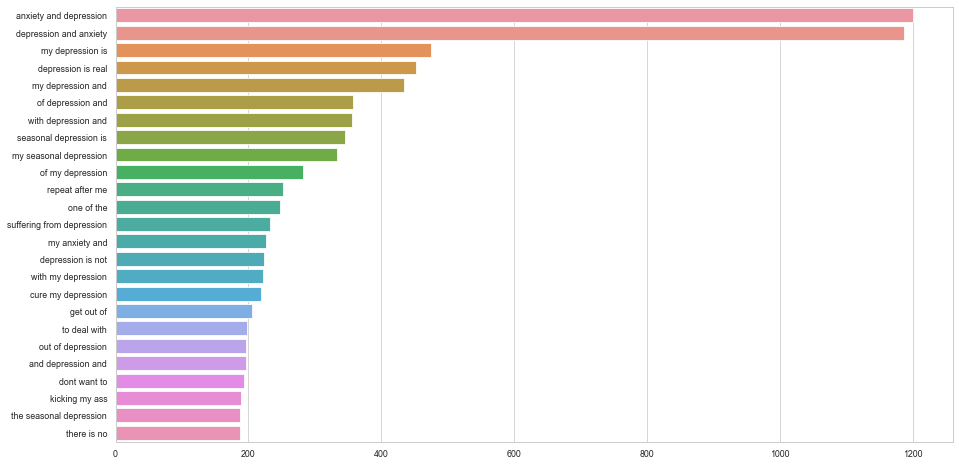

In [63]:
dep_trigrams = top_ngrams(dep_df['Clean_Text'], 3)[:25]
PlotTrigrams(dep_trigrams)

---
Again, of the depression-oriented text corpus, the top trigram is 'depression and anxiety' or 'anxiety and depression,' followed by combinations related to curing or getting out of depression and mentions of seasonality. These combinations follow well, given the high comorbidity of anxiety and depression, as well as fall season during which these tweets were posted that often entails higher rates of seasonal depression. 

---

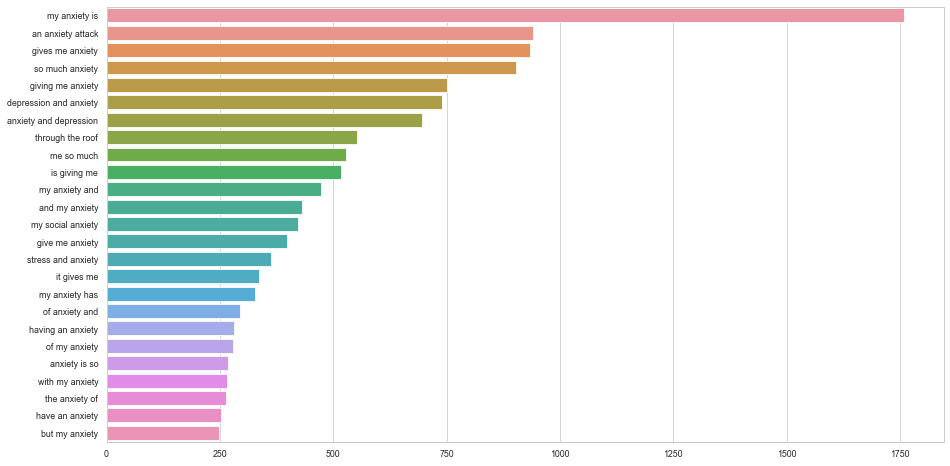

In [64]:
anx_trigrams = top_ngrams(anx_df['Clean_Text'], 3)[:25]
PlotTrigrams(anx_trigrams)

---
Of the anxiety-oriented corpus, the top trigrams are 'my anxiety is' and 'an anxiety attack,' with other popular word combinations often centered around 'my', 'give'and 'having' anxiety. Depression is again also commonly associated, going hand-in-hand with the two disorders' high comorbidity. 